# Tutorial 4: SVM classifier for Breast Classification problem

Accuracy of SVM classifier: 95.61%


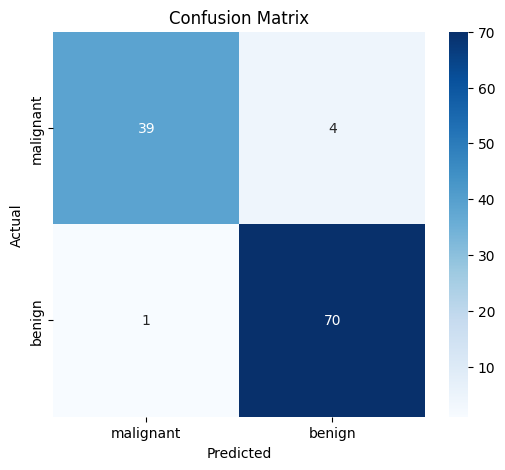

AUC: 1.00


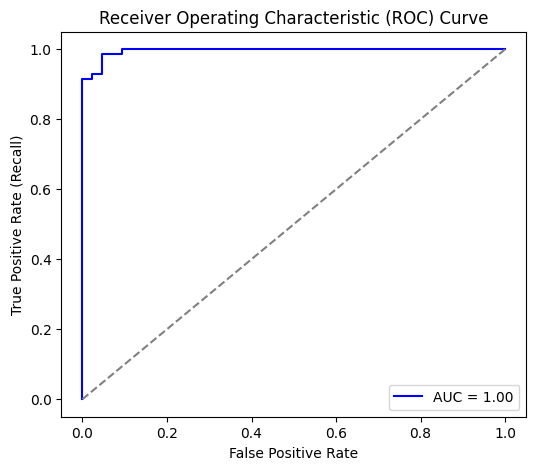

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
data = load_breast_cancer()

# Features and target
X = data.data  # Features
y = data.target  # Target (malignant or benign)

# Split the data into training and testing sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier (using a linear kernel)
svm = SVC(kernel='linear', probability=True, random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)
y_prob = svm.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (malignant)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM classifier: {accuracy * 100:.2f}%")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.2f}")

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend(loc='lower right')
plt.show()

# tutorial 5: SVM kernal Radial Basis function (RBF), with C and Gamma,


Accuracy of SVM classifier: 89.47%


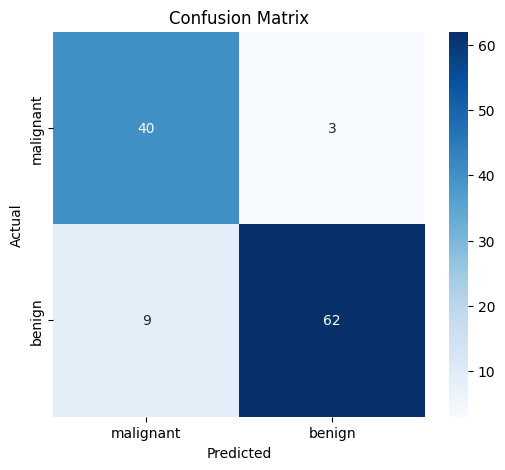

AUC: 0.96


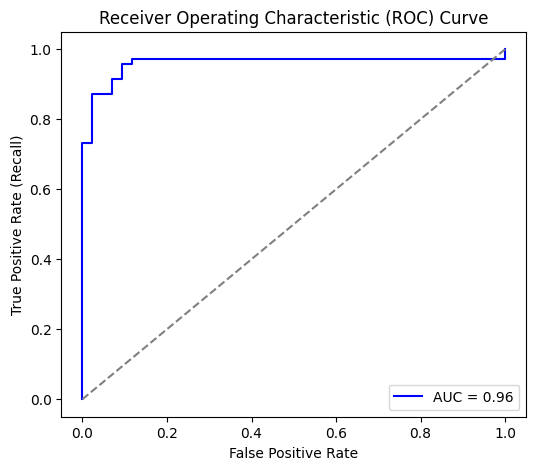

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
data = load_breast_cancer()

# Features and target
X = data.data  # Features
y = data.target  # Target (malignant or benign)

# Split the data into training and testing sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier with custom C and gamma values
svm = SVC(
    C=15,                        # Custom regularization parameter
    kernel='rbf',                 # Radial Basis Function kernel
    gamma=0.0015,                   # Custom gamma value
    probability=True,             # Enable probability estimates for ROC
    random_state=42               # Random state for reproducibility
)

# Train the model
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)
y_prob = svm.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (malignant)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM classifier: {accuracy * 100:.2f}%")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.2f}")

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend(loc='lower right')
plt.show()

# **Tutorial 6: SVM and K-fold cross validation **

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
data = load_breast_cancer()

# Features and target
X = data.data  # Features
y = data.target  # Target (malignant or benign)

# Split the data into training and testing sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier with custom C and gamma values
svm = SVC(
    C=15,                        # Custom regularization parameter
    kernel='rbf',                 # Radial Basis Function kernel
    gamma=0.0015,                   # Custom gamma value
    probability=True,             # Enable probability estimates for ROC
    random_state=42               # Random state for reproducibility
)




# -------------------Train 5 folds cross validation ------------------------
# K-fold = 5
# cv= k-fold=5

# Perform 5-fold cross-validation and get the accuracy scores
scores = cross_val_score(svm, X_train, y_train, cv=5)

# Print the accuracy scores for each fold
print("Accuracy for each fold: ", scores)

# Print the mean accuracy across all folds
print("Mean accuracy: ", scores.mean())
#-----------------------------------------------------------------------------








Accuracy for each fold:  [0.91208791 0.9010989  0.92307692 0.87912088 0.89010989]
Mean accuracy:  0.9010989010989011


# **Tutorial 7: SVM with manual Kfold cross validation**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
data = load_breast_cancer()

# Features and target
X = data.data  # Features
y = data.target  # Target (malignant or benign)

# Split the data into training and testing sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier with custom C and gamma values
svm = SVC(
    C=15,                        # Custom regularization parameter
    kernel='rbf',                 # Radial Basis Function kernel
    gamma=0.0015,                   # Custom gamma value
    probability=True,             # Enable probability estimates for ROC
    random_state=42               # Random state for reproducibility
)




# -------------------Train 5 folds cross validation ------------------------


# Initialize KFold for 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store the trained models and their corresponding test set indices
trained_models = []
test_indices = []

# Perform 5-fold cross-validation manually
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model on the training data
    svm.fit(X_train, y_train)

    # Store the trained model and the test set index
    trained_models.append(svm)
    test_indices.append(test_index)

    # Test the model on the test data and print the score
    y_pred = svm.predict(X_test)
    print(f"Accuracy for fold (test set {test_index}): ", accuracy_score(y_test, y_pred))











Accuracy for fold (test set [  2   6   9  10  11  29  30  39  55  70  72  73  75  76  77  78  79  81
  82  83  84  86  90 101 104 109 110 118 131 132 140 144 145 148 153 158
 163 165 167 177 182 188 196 203 204 208 211 222 228 235 238 249 250 255
 257 264 265 271 274 275 281 284 305 320 322 329 331 332 333 334 353 362
 369 380 382 384 393 394 395 408 422 424 425 431 441 457 462 464 468 477
 482 486 500 503 511 520 526 527 528 530 531 532 535 538 540 549 551 555
 556 557 561 564 565 567]):  0.8947368421052632
Accuracy for fold (test set [  0   7  15  17  18  19  22  24  25  31  33  42  46  49  54  56  57  60
  63  66  68  69  88  89  93 108 113 114 117 124 126 137 141 149 154 155
 172 173 174 176 181 184 185 192 195 199 209 210 218 227 231 234 244 245
 247 248 261 268 272 277 280 287 289 290 298 301 304 310 311 319 325 341
 346 355 364 374 381 390 396 398 399 402 404 407 410 411 414 421 426 428
 434 442 446 449 453 470 494 495 497 498 501 507 512 517 523 539 541 542
 545 547 550 553 562

# **Tutorial 8: SVM for regression using Diabetes data**




In [ ]:
from sklearn.svm import SVR
from sklearn.datasets import load_diabetes
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Step 1: Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Create a DataFrame for easier viewing
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['Target'] = y  # Add the target column to the DataFrame

# Display the first few rows of the data
print(df.head())  # Display the first 5 samples with labels

# Initialize KFold for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the Support Vector Regression model (SVM for Regression)
svm_regressor = SVR(kernel='rbf', C=100, gamma='scale')

# Collect performance metrics for each fold
mse_scores = []  # Mean squared error for each fold
r2_scores = []   # R^2 scores for each fold

# Perform 5-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets based on the current fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the SVR model
    svm_regressor.fit(X_train, y_train)

    # Predict using the trained model
    y_pred = svm_regressor.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    r2_scores.append(r2)

# Calculate and display the average performance
print(f"Average Mean Squared Error (MSE): {np.mean(mse_scores)}")
print(f"Average R^2 Score: {np.mean(r2_scores)}")


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  Target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
Average Mean Squared Error (MSE): 3218.930315539571
Average R^2 Score: 0.44939847316460196


0.49 is moderate. It means your model is explaining 49% of the variance, but there is room for improvement.

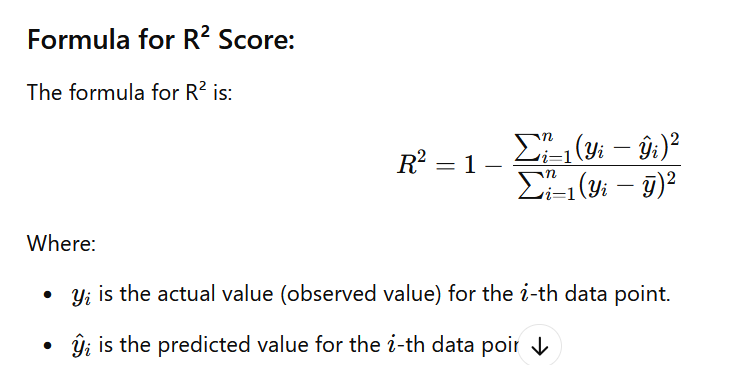



Interpretation of R² Score:

    R² = 1: Perfect fit. The model explains 100% of the variance in the target variable. All predictions are exactly correct.
    0 < R² < 1: The model explains some portion of the variance. The closer the value is to 1, the better the model performs.
    R² = 0: The model does not explain any of the variance in the target variable. It is equivalent to simply predicting the mean of the target variable for all data points.
    R² < 0: This can happen when the model performs worse than simply predicting the mean of the target variable. In other words, the model is doing worse than random predictions. This is typically a sign of poor model performance or incorrect usage of the model

   Actual   Predicted
0   219.0  122.659816
1    70.0  184.190653
2   202.0  177.270712
3   230.0  222.451478
4   111.0  109.879303


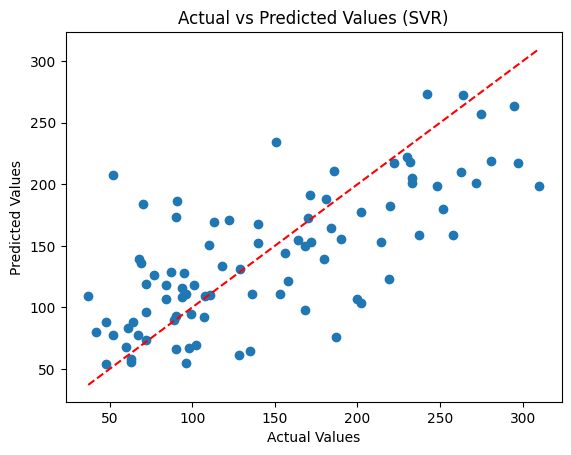

In [ ]:
from sklearn.svm import SVR
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 1: Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data  # Features (independent variables)
y = diabetes.target  # Labels (dependent variable)

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Support Vector Regressor (SVR)
svm_regressor = SVR(kernel='rbf', C=100, gamma='scale')
svm_regressor.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = svm_regressor.predict(X_test)

# Step 5: Create a DataFrame to display actual vs predicted values
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Step 6: Display the results
print(results.head())  # Display the first 5 samples of actual vs predicted



import matplotlib.pyplot as plt

# Step 7: Visualize the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (SVR)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.show()



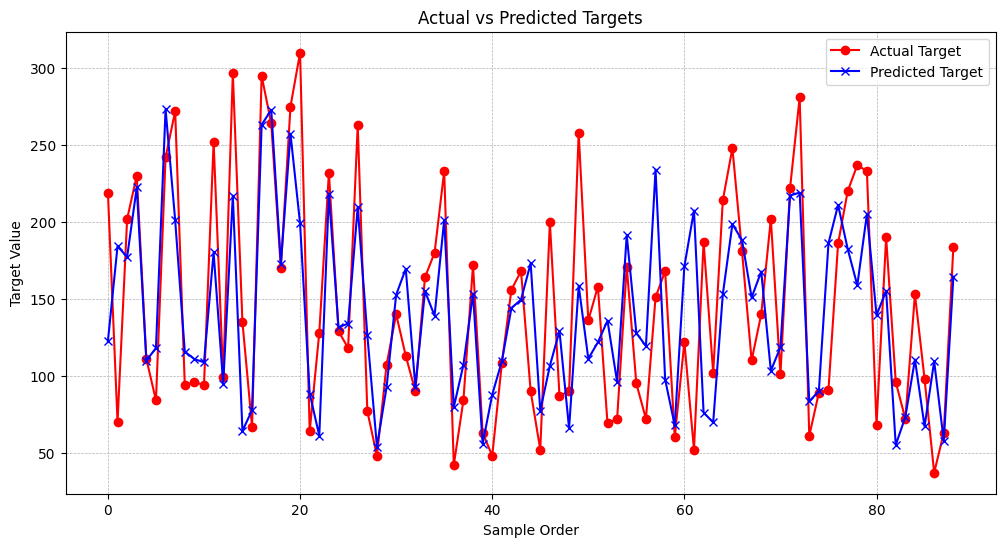

In [ ]:
# Step 8: Set up the figure with increased width
plt.figure(figsize=(12, 6))  # Width is 12 and Height is 6 (you can adjust these values)

# Plot actual and predicted values
plt.plot(range(len(y_test)), y_test, color='red', label='Actual Target', linestyle='-', marker='o')  # Actual targets in red
plt.plot(range(len(y_pred)), y_pred, color='blue', label='Predicted Target', linestyle='-', marker='x')  # Predicted targets in blue

# Add labels and title
plt.xlabel("Sample Order")
plt.ylabel("Target Value")
plt.title("Actual vs Predicted Targets")

# Add grid to the plot for better visibility
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show legend
plt.legend()

# Show the plot
plt.show()


# **Tutorial 9: SV for multi class problem**

# Note: in Sklearn library, one vs one is the default startigy for SVM classification model


Accuracy: 1.00


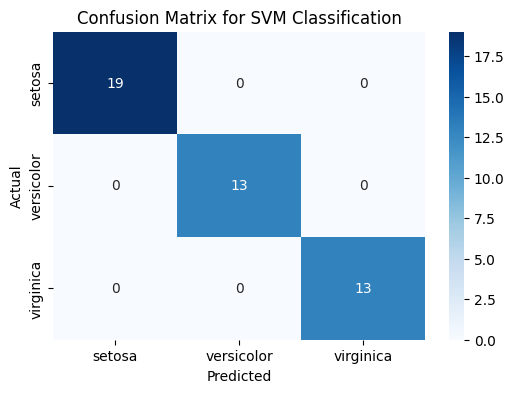

In [ ]:
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels (target)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the Support Vector Classifier (SVM)
svm_classifier = SVC(kernel='linear')  # Using linear kernel
svm_classifier.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Step 5: Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 6: Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix for SVM Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **Tutorial 10: Multi class SVM classifier using (one vs all) stratigy**



Accuracy: 1.00


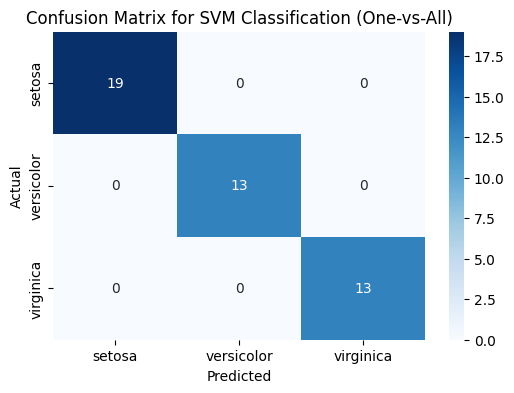

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels (target)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the Support Vector Classifier (SVM) with One-vs-All (OvA)
svm_classifier = SVC(kernel='linear', decision_function_shape='ovr')  # OvA (One-vs-All)
svm_classifier.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Step 5: Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 6: Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix for SVM Classification (One-vs-All)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **Tutorial 11: Engineering features and SVM for multi class problem**

In [ ]:
import numpy as np
import cv2
from sklearn.datasets import fetch_openml
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.to_numpy()  # Features (28x28 images flattened to 784 features)
y = mnist.target.to_numpy().astype(int)  # Labels (digits 0-9)

# Step 2: Reshape the data to get the images back to 28x28 shape
X_images = X.reshape(-1, 28, 28)  # Reshape to (num_samples, 28, 28)

# Step 3: Extract Haar-like features using OpenCV (Haar feature extraction)
def extract_haar_features(images):
    haar_features = []
    for image in images:
        # Convert image to a format compatible with Haar feature extraction (grayscale)
        gray_image = np.uint8(image)

        # Use a simple Haar-like feature extractor for each 24x24 region
        # You can add more complex Haar features, but for simplicity, we will use the default ones.
        features = cv2.HOGDescriptor()
        feature_vector = features.compute(gray_image)

        # Flatten and append the feature vector to the list
        haar_features.append(feature_vector.flatten())

    return np.array(haar_features)

# Step 4: Extract Haar-like features for the entire dataset
X_haar_features = extract_haar_features(X_images)

# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_haar_features, y, test_size=0.3, random_state=42)

# Step 6: Train an SVM classifier (linear kernel)
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Step 8: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of SVM classifier on MNIST dataset with Haar features: {accuracy * 100:.2f}%')

# Step 9: Visualize some test results (actual vs predicted labels)
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_test[i]}\nPred: {y_pred[i]}')
    plt.axis('off')
plt.show()
